# Install required libraries

In [ ]:
#install scikit-learn
#!pip install scikit-learn

In [ ]:
#install spacy
#!pip install -U spacy

In [ ]:
#install language vocabulary
#!python -m spacy download en

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the dataset into a dataframe

In [2]:
df=pd.read_csv('smsspamcollection.tsv',sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


# View Spam Ham distribution in the dataset

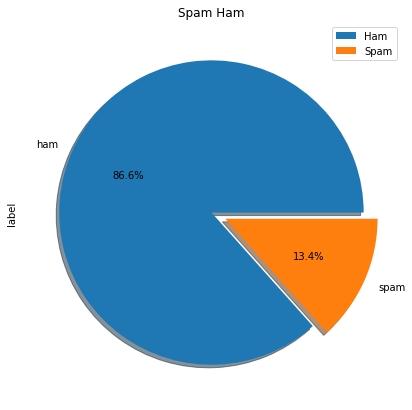

In [4]:
df["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (7, 7), autopct = '%1.1f%%', shadow = True)
plt.title("Spam Ham")
plt.legend(["Ham", "Spam"])
plt.show()

# Check for null values

In [5]:
df.isnull().sum()
#There are no null values

label      0
message    0
length     0
punct      0
dtype: int64

# Number of samples given in the dataset

In [6]:
len(df)

5572

# Check number Spam and Ham Messages

In [7]:
df['label'].value_counts()
#The data is highly imbalanced
#we will not get good accuracy

ham     4825
spam     747
Name: label, dtype: int64

# Consider Balance Data only

In [8]:
#Store all the ham messages in a label
ham=df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [9]:
#Store all the spam messages in a seperate variable
spam=df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [10]:
#Shape of ham and spam
ham.shape,spam.shape

((4825, 4), (747, 4))

In [11]:
#Call ham randomly
ham=ham.sample(spam.shape[0])

In [12]:
ham.shape,spam.shape
#Now spam and ham both are in same shape

((747, 4), (747, 4))

In [13]:
#Append the spam and ham
#This dataframe will contain ham in the beginning and spam in the ending
data=ham.append(spam,ignore_index=True)
#data.reset_index(inplace=True)
#View the head
data.head()

,label,message,length,punct
0,ham,Hey i've booked the pilates and yoga lesson al...,59,4
1,ham,When are you guys leaving?,26,1
2,ham,What time you thinkin of goin?,30,1
3,ham,"Piggy, r u awake? I bet u're still sleeping. I...",69,8
4,ham,I sent you the prices and do you mean the &lt...,55,6


In [14]:
#View the tail
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


# Exploratory Data Analysis

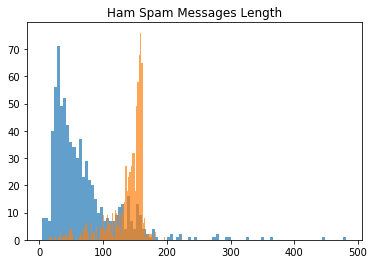

In [15]:
#Spam Messages have more number of characters
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.title("Ham Spam Messages Length")
plt.show()

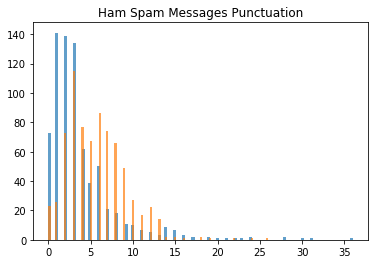

In [16]:
#No specific conclusion with respect to number of punctuations
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.title("Ham Spam Messages Punctuation")
plt.show()

# Data Preparation

In [17]:
#Import libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from mlxtend.plotting import plot_confusion_matrix

In [18]:
#We need TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
data.head()

,label,message,length,punct
0,ham,Hey i've booked the pilates and yoga lesson al...,59,4
1,ham,When are you guys leaving?,26,1
2,ham,What time you thinkin of goin?,30,1
3,ham,"Piggy, r u awake? I bet u're still sleeping. I...",69,8
4,ham,I sent you the prices and do you mean the &lt...,55,6


In [20]:
data.shape

(1494, 4)

In [21]:
#Train Test Data Split
#Shuffle will make sure that Ham and Spam are shuffled together in a random way
#Stratify will make sure that Ham and Spam are divided into training and test in 70% and 30% proportionally
X_train,X_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True,stratify=data['label'])

In [22]:
X_train
#The first one looks like spam. Lets check the corresponding y label

1128    U’ve Bin Awarded £50 to Play 4 Instant Cash. C...
742         Not directly behind... Abt 4 rows behind ü...
477     Hi mate its RV did u hav a nice hol just a mes...
542                   At WHAT TIME should i come tomorrow
1277    Ringtone Club: Gr8 new polys direct to your mo...
789     HMV BONUS SPECIAL 500 pounds of genuine HMV vo...
1319    FREEMSG: Our records indicate you may be entit...
736     Its ok chikku, and its my 1 of favourite song....
140                                             Ok lor...
1005    FREE NOKIA Or Motorola with upto 12mths 1/2pri...
702     You're gonna have to be way more specific than...
964     Thanks for the Vote. Now sing along with the s...
1480    Get your garden ready for summer with a FREE s...
90      Fuck babe ... What happened to you ? How come ...
276                        So when do you wanna gym harri
200     I need an 8th but I'm off campus atm, could I ...
568                            No dear i was sleeping :-P
586     Yes ba

In [23]:
y_train

1128    spam
742      ham
477      ham
542      ham
1277    spam
789     spam
1319    spam
736      ham
140      ham
1005    spam
702      ham
964     spam
1480    spam
90       ham
276      ham
200      ham
568      ham
586      ham
1099    spam
214      ham
271      ham
845     spam
801     spam
1053    spam
428      ham
1214    spam
590      ham
389      ham
1007    spam
557      ham
        ... 
1209    spam
113      ham
48       ham
613      ham
0        ham
369      ham
325      ham
253      ham
1437    spam
683      ham
634      ham
465      ham
647      ham
162      ham
534      ham
1091    spam
499      ham
103      ham
624      ham
516      ham
405      ham
1171    spam
1069    spam
22       ham
364      ham
1211    spam
312      ham
268      ham
272      ham
1222    spam
Name: label, Length: 1045, dtype: object

# Bag of Words creation

In [ ]:
vectorizer=TfidfVectorizer()

In [ ]:
X_train=vectorizer.fit_transform(X_train)

In [ ]:
X_train.shape

In [ ]:
X_train

# Pipeline and Random Forest Classifier

In [24]:
#n_jobs=-1 -1 means using all processors.
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [25]:
#Run this before executing the bag of words or else it will throw error
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [26]:
#Prediction
y_pred=clf.predict(X_test)

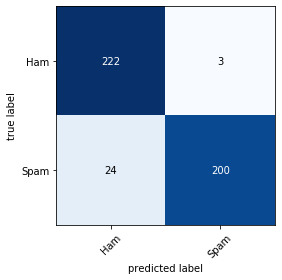

In [28]:
#Confusion Matrix
mat=confusion_matrix(y_test,y_pred)
fig,ax=plot_confusion_matrix(conf_mat=mat,figsize=(4,4),class_names=['Ham','Spam'],show_normed=False)
plt.tight_layout()

In [29]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       225
        spam       0.99      0.89      0.94       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [30]:
#Accuracy Score
accuracy_score(y_test,y_pred)

0.9398663697104677

# Predict a real message

In [31]:
clf.predict(["Hi, This is Fendo"])

array(['ham'], dtype=object)

In [32]:
clf.predict(["Hey, Gud afternoon"])

array(['ham'], dtype=object)

In [33]:
clf.predict(["Congratulations! you have won free tickets to U.S. this summer. Text 'WON' to 445566"])

array(['spam'], dtype=object)

In [34]:
clf.predict(["you have won free tickets to U.S. this summer"])

array(['spam'], dtype=object)

In [35]:
clf.predict(["you have won tickets to U.S. this summer"])

array(['ham'], dtype=object)

# Pipeline and SVM

In [36]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=1,gamma='auto'))])

In [37]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degre

In [38]:
y_pred=clf.predict(X_test)

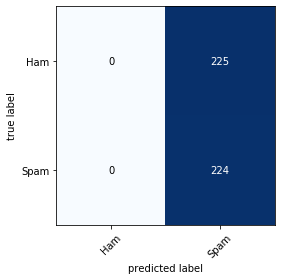

In [39]:
#Confusion Matrix
mat=confusion_matrix(y_test,y_pred)
fig,ax=plot_confusion_matrix(conf_mat=mat,figsize=(4,4),class_names=['Ham','Spam'],show_normed=False)
plt.tight_layout()

#Everything is classified as Spam as we are not using penalty
#Include the penalty in pipeline

              precision    recall  f1-score   support

         ham       0.00      0.00      0.00       225
        spam       0.50      1.00      0.67       224

    accuracy                           0.50       449
   macro avg       0.25      0.50      0.33       449
weighted avg       0.25      0.50      0.33       449



C:\Users\vedav\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.49888641425389757

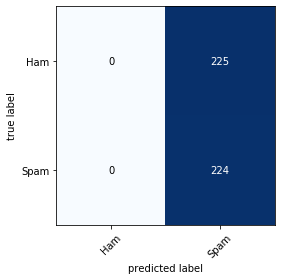

In [40]:
#Use penalty of 10
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=10,gamma='auto'))])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
#Confusion Matrix
mat=confusion_matrix(y_test,y_pred)
fig,ax=plot_confusion_matrix(conf_mat=mat,figsize=(4,4),class_names=['Ham','Spam'],show_normed=False)
plt.tight_layout()
print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

         ham       0.87      0.98      0.92       225
        spam       0.97      0.86      0.91       224

    accuracy                           0.92       449
   macro avg       0.92      0.92      0.92       449
weighted avg       0.92      0.92      0.92       449



0.9175946547884187

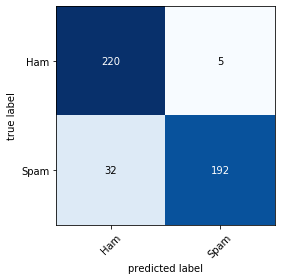

In [41]:
#increase penalty to 100
#Use penalty of 10
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=100,gamma='auto'))])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
#Confusion Matrix
mat=confusion_matrix(y_test,y_pred)
fig,ax=plot_confusion_matrix(conf_mat=mat,figsize=(4,4),class_names=['Ham','Spam'],show_normed=False)
plt.tight_layout()
print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

         ham       0.93      0.95      0.94       225
        spam       0.95      0.93      0.94       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



0.9420935412026726

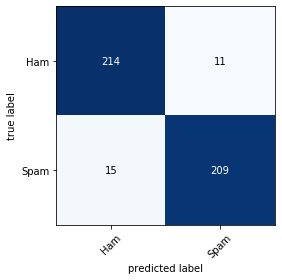

In [42]:
#Use penalty of 2000
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=2000,gamma='auto'))])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
#Confusion Matrix
mat=confusion_matrix(y_test,y_pred)
fig,ax=plot_confusion_matrix(conf_mat=mat,figsize=(4,4),class_names=['Ham','Spam'],show_normed=False)
plt.tight_layout()
print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)